# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme







- **Scatterplot**:
    Un graph qui utilise le placement de points avec des coordonnées cartésiennes.
    Pour identifier le type de relation (s'il y en a une) entre deux variables quantitatives (qui mesure une propriété métrique).
  
- **Barplot**:
    Un graph où les catégories sont représentées par des barres.
    Leur hauteur / valeur est proportionnelle aux valeurs qu'elles representent.

- **Boxplot**:
    Résumé statistique en 5 chiffres:
    - Minimum
    - Maximum
    - Premier Quartile
    - Mediane
    - Troisième Quartile
    Représentation plus précise d'une vue statistique sur un sous-ensemble de données.

- **Violinplot**:
    Similaire au boxplot, mais la bar est plus ou moins épaisse. Donnant les densités.
    Pour visualiser des distributions et étudier leur probabilités.

- **Histogramme**:
    Similaire au barplot. Les barres répresentent des intervals, l'aire représente la fréquence et la taille le nombre d'occurence (ou autre valeur selon le contexte).
    Moyen rapide pour étudier la répartition d’une variable.


# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Format tsv (Tab-Separated Values)
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Nom d'Organisation 
Kingdom        Niveau Taxinomic: Archaea, Bactérie, Eukaryota ou Virus 
Group                  Groupe les plus communs
                       Eukaryota: Animaux, Fungi (champignons), Plantes, Protistas;                  
                       Prokaryota: Phylum; 
                       Virus: Premier niveau                       
                       Sous l'ordre des virus

SubGroup       NCBI niveau de taxonomie inférieur:
                       Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians
                       Reptiles, Roundworms, Ascomycetes, Basidiomycetes, 
                       Land Plants, Green Algae, Apicomplexans, Kinetoplasts; 
                       Prokaryota: sub-groups correspond to class level; 
                       Viruses: sub-groups correspond to families including floating genera 

Size (Mb)      Estimated genome size 
Chrs           Number of chromosomes 
Organelles     Number of the organelles 
Plasmids       Number of plasmids 
BioProjects    Number of genome sequencing projects 

```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [3]:
import pandas as pd

#Read the file
table = pd.read_csv('Ressources/overview.txt', sep='\t')

#Get the column
kingdom = table['#Organism/Name']

# DUP HERE
#print(kingdom[kingdom.duplicated(keep=False)])

#Get unique vars
unique = kingdom.unique()
#Here you are :D
print(len(unique))

87887


C:\Users\axell\AppData\Local\Temp\ipykernel_34124\2411388822.py:4: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv('Ressources/overview.txt', sep='\t')


Il y a 87887 organismes.

### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
C'est le plus haut niveau de classification des êtres vivants. Dans les classifications les plus récentes, le royaume (règne) n'est plus que le deuxième niveau de classification du vivant, après le domaine ou l'empire.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il existe 6 règnes : les bactéries, les protistes, les champignons, les animaux, les végétaux et les virus.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [4]:
#Table From earlier

Royaume = table['Kingdom']
Royaume = Royaume.unique()

Dict = dict()
for r in Royaume:
    Dict[r] = 0

for index, row in table.iterrows():
    Dict[row[1]] += 1

print(Dict)

C:\Users\axell\AppData\Local\Temp\ipykernel_34124\1370127272.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Dict[row[1]] += 1


{'Bacteria': 37492, 'Viruses': 32573, 'Eukaryota': 15560, 'Archaea': 2263}


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Regroupe des espèces partageant des critères spécifiques et un même ancêtre commun.
```

Q9. Combien de groupes sont présents par royaume ?

In [5]:
#Table from earlier

Dict_r = dict()
for r in Royaume:
    Dict_r[r] = 0

print(table.groupby('Group')["Kingdom"].count())

Group
Acidobacteriota                         256
Animals                                7789
Aquificota                               42
Asgard group                             61
Atribacterota                            43
Bacteria incertae sedis                3872
Bdellovibrionota                        122
Caldisericota/Cryosericota group         21
Calditrichota                            10
Campylobacterota                        256
Candidatus Deferrimicrobiota              2
Candidatus Hadarchaeota                   8
Candidatus Hinthialibacterota             2
Candidatus Hydrothermarchaeota            6
Candidatus Krumholzibacteriota            4
Candidatus Lernaellota                    2
Candidatus Moduliflexota                  2
Candidatus Tharpellota                    2
Candidatus Thermoplasmatota             432
Chrysiogenota                             6
Coprothermobacterota                      5
DPANN group                             249
Deferribacterota          

Il y a 57 groupes

Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [12]:
Groups = table['Group'].unique()  # Liste des groupes uniques

Dict_rg = { (r, g): 0 for r in Royaume for g in Groups }

# Comptage des organismes par groupe et par royaume
for index, element in table.iterrows():
    royaume = element[1]  
    groupe = element[2]  
    Dict_rg[(royaume, groupe)] += 1

# Supprimer les entrées où le comptage est nul
Dict_rg = {k: v for k, v in Dict_rg.items() if v > 0}

print(Dict_rg)


C:\Users\axell\AppData\Local\Temp\ipykernel_34124\3931896856.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  royaume = element[1]
C:\Users\axell\AppData\Local\Temp\ipykernel_34124\3931896856.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  groupe = element[2]


{('Bacteria', 'Terrabacteria group'): 13337, ('Bacteria', 'unclassified Bacteria'): 346, ('Bacteria', 'Other'): 2, ('Bacteria', 'FCB group'): 5037, ('Bacteria', 'Pseudomonadota'): 11098, ('Bacteria', 'Acidobacteriota'): 256, ('Bacteria', 'Synergistota'): 85, ('Bacteria', 'Bacteria incertae sedis'): 3872, ('Bacteria', 'PVC group'): 1091, ('Bacteria', 'Myxococcota'): 146, ('Bacteria', 'Campylobacterota'): 256, ('Bacteria', 'Thermodesulfobacteriota'): 568, ('Bacteria', 'Spirochaetota'): 344, ('Bacteria', 'Aquificota'): 42, ('Bacteria', 'Thermotogota'): 72, ('Bacteria', 'Atribacterota'): 43, ('Bacteria', 'Bdellovibrionota'): 122, ('Bacteria', 'delta/epsilon subdivisions'): 288, ('Bacteria', 'Caldisericota/Cryosericota group'): 21, ('Bacteria', 'Deferribacterota'): 27, ('Bacteria', 'Calditrichota'): 10, ('Bacteria', 'Candidatus Lernaellota'): 2, ('Bacteria', 'Elusimicrobiota'): 118, ('Bacteria', 'Fusobacteriota'): 79, ('Bacteria', 'Candidatus Deferrimicrobiota'): 2, ('Bacteria', 'Nitrospino

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

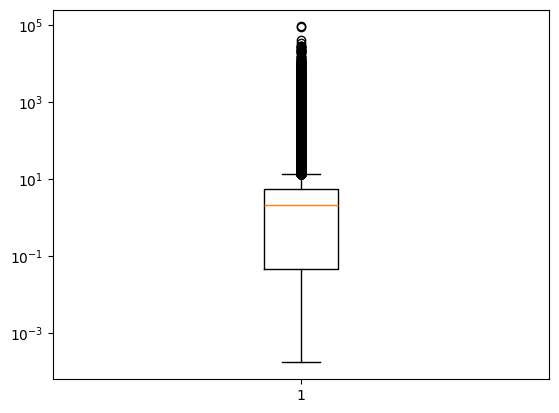

In [8]:
import matplotlib.pyplot as plt

# Getting Sizes
size = table['Size (Mb)']
size = pd.to_numeric(size, errors='coerce')
size = size.dropna().tolist()

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

ax.boxplot(size)
plt.show()

Q12. Affichez la distribution par royaume.

C:\Users\axell\AppData\Local\Temp\ipykernel_34124\1782956410.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Dict_dr[element[1]].append(float(size[index]))


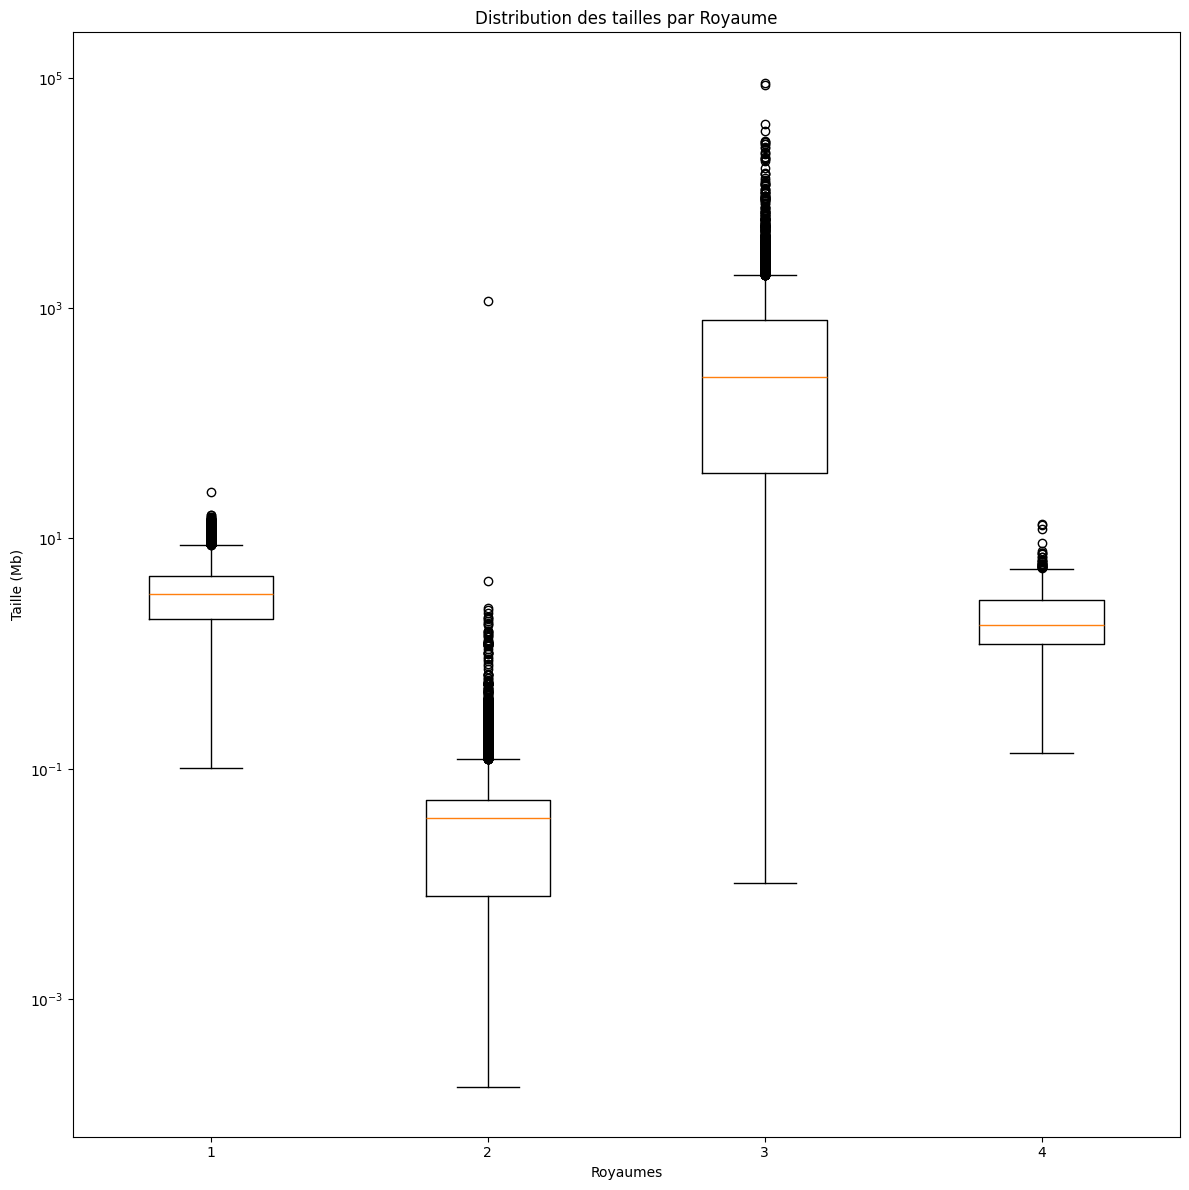

In [9]:
size = table['Size (Mb)']

Dict_dr = dict()
for r in Royaume:
    Dict_dr[r] = []
for index, element in table.iterrows():
    if(size[index] != '-'):
        Dict_dr[element[1]].append(float(size[index]))

fig, ax = plt.subplots(figsize=(12,12))

ax.set_yscale('log')
ax.boxplot(Dict_dr.values())
ax.set_title("Distribution des tailles par Royaume")
ax.set_ylabel("Taille (Mb)")
ax.set_xlabel("Royaumes")

plt.tight_layout()
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

C:\Users\axell\AppData\Local\Temp\ipykernel_34124\597520762.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  royaume = element[1]
C:\Users\axell\AppData\Local\Temp\ipykernel_34124\597520762.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  groupe = element[2]


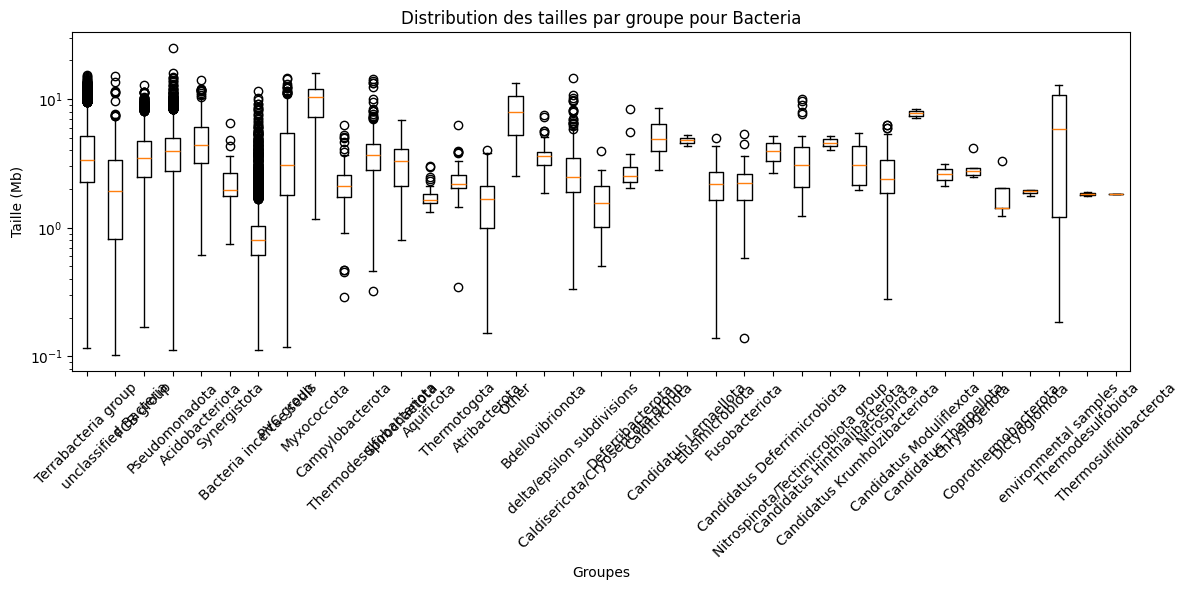

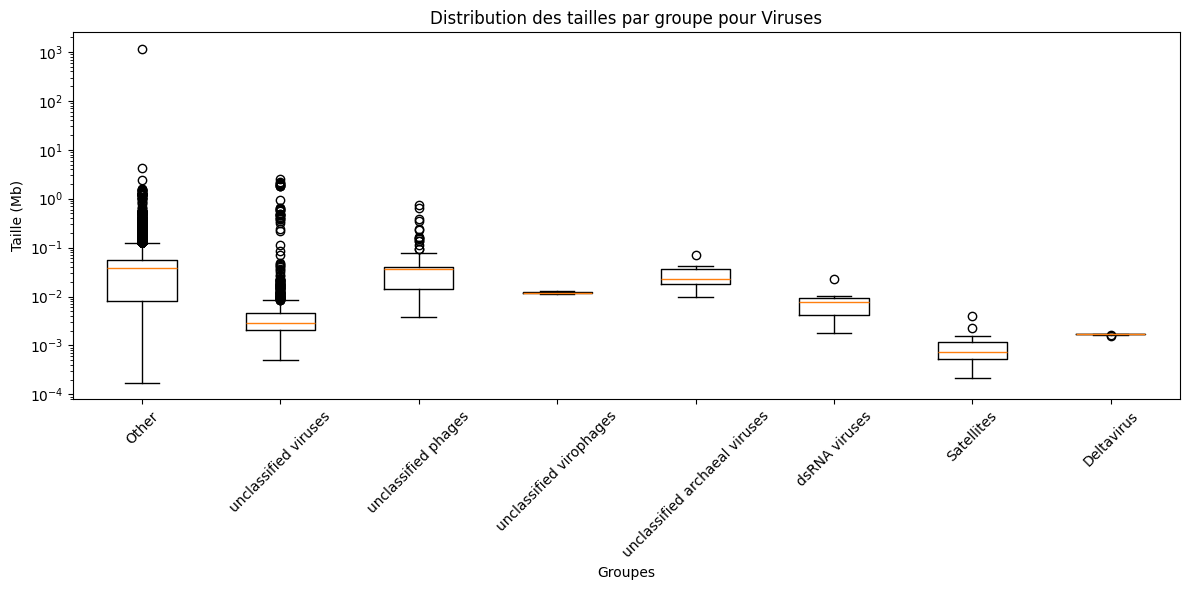

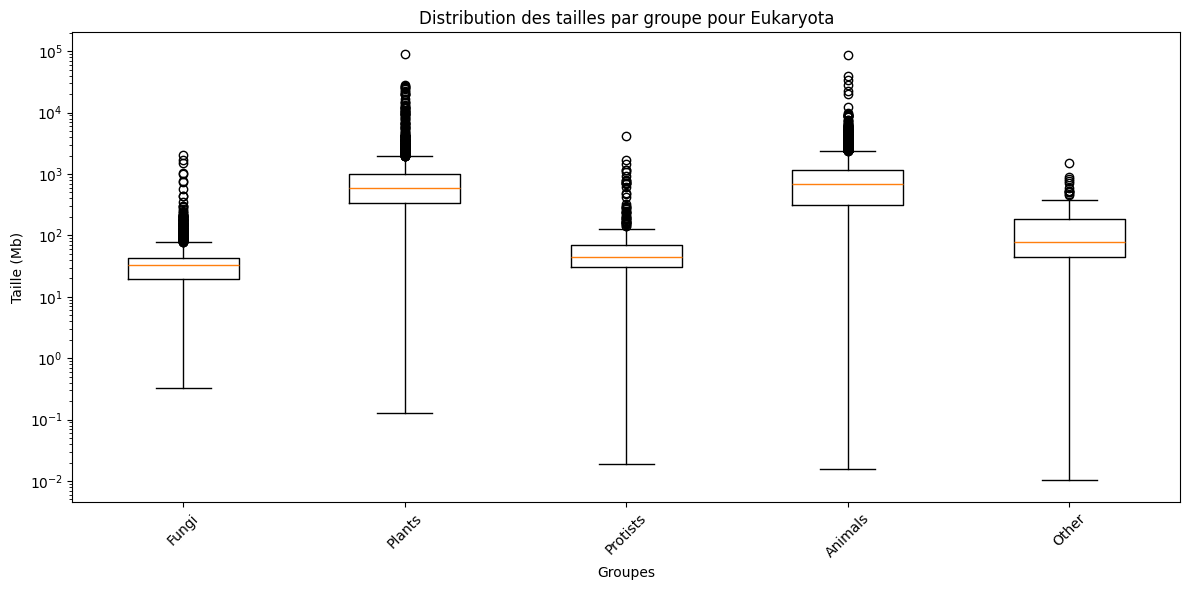

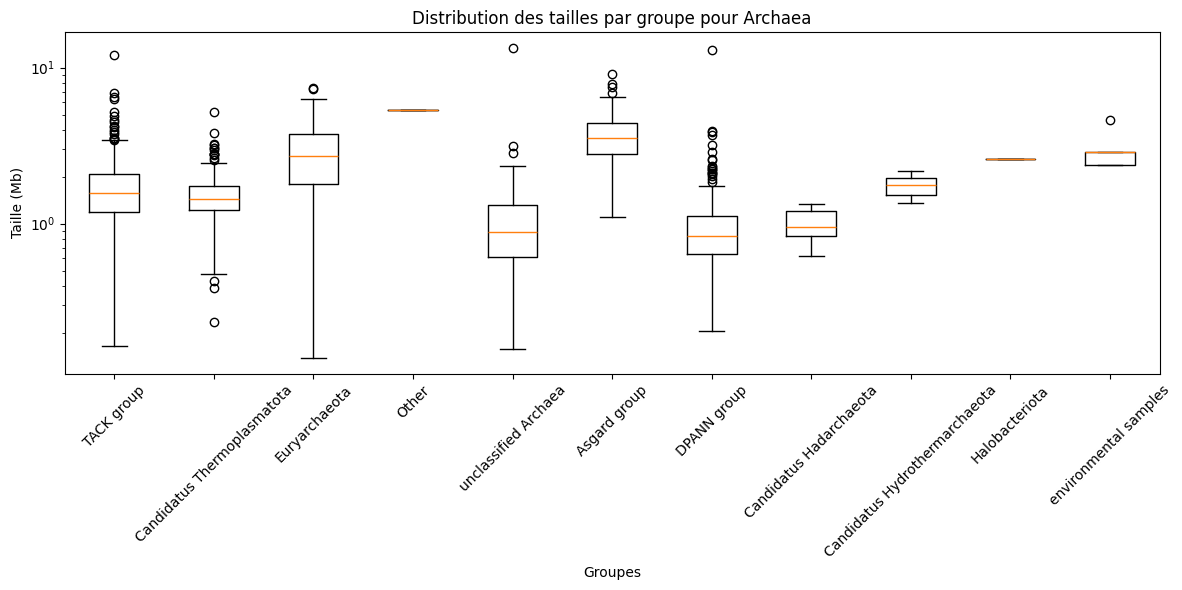

In [ ]:
size = table['Size (Mb)']

Dict_grp = dict()
for r in Royaume:
    Dict_grp[r] = {}

for index, element in table.iterrows():
    if size[index] != '-':
        royaume = element[1]
        groupe = element[2]
        taille = float(size[index])

        if groupe not in Dict_grp[royaume]:
            Dict_grp[royaume][groupe] = []
        Dict_grp[royaume][groupe].append(taille)


for royaume, groupes in Dict_grp.items():
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.set_yscale('log')
    ax.boxplot(groupes.values(), tick_labels=groupes.keys(), vert=True)

    ax.set_title(f"Distribution des tailles par groupe pour {royaume}")
    ax.set_ylabel("Taille (Mb)")
    ax.set_xlabel("Groupes")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [19]:
table_filtered = table[table['Size (Mb)'] != '-'].copy() #exclusion des vides
table_filtered['Size (Mb)'] = table_filtered['Size (Mb)'].astype(float) #Float conversion okazoo

min_genomes = {}
max_genomes = {}

for r in Royaume:
    sub = table_filtered[table_filtered['Kingdom'] == r]

    if not sub.empty:
        min_row = sub.loc[sub['Size (Mb)'].idxmin()]
        max_row = sub.loc[sub['Size (Mb)'].idxmax()]

        min_genomes[r] = (min_row['#Organism/Name'], float(min_row['Size (Mb)']))
        max_genomes[r] = (max_row['#Organism/Name'], float(max_row['Size (Mb)']))

print(min_genomes)

{'Bacteria': ('bacterium AG-323-L21', 0.101587), 'Viruses': ('Hippotragine gammaherpesvirus 1', 0.000174), 'Eukaryota': ('Fragilariopsis kerguelensis', 0.010223), 'Archaea': ('candidate division MSBL1 archaeon SCGC-AAA385M02', 0.137797)}


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [20]:
print(max_genomes)

{'Bacteria': ('Thiomonas', 25.1426), 'Viruses': ('uncultured virus', 1150.68), 'Eukaryota': ('Viscum album', 91113.7), 'Archaea': ('archaeon', 13.3999)}


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

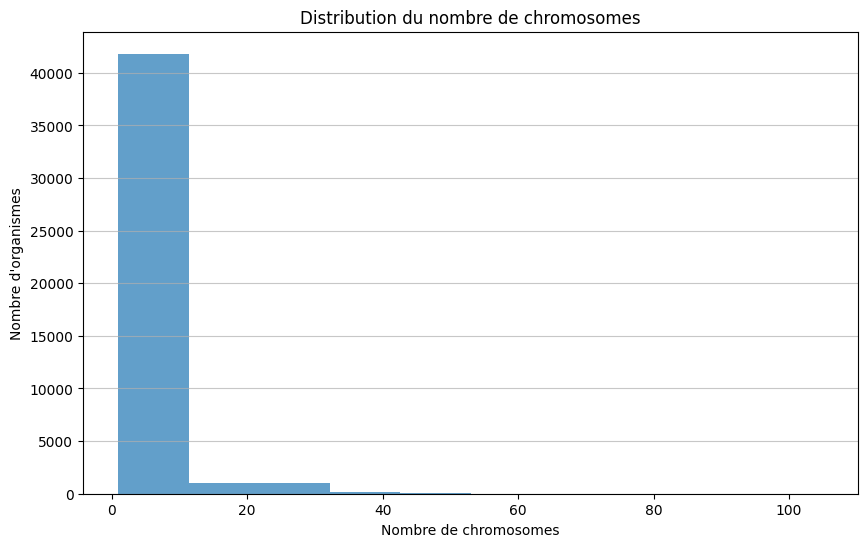

In [ ]:
# Filtrer les valeurs non valides et convertir en int
table_filtered = table[table['Chrs'] != '-'].copy()
table_filtered['Chrs'] = table_filtered['Chrs'].astype(int)

plt.figure(figsize=(10, 6))
plt.hist(table_filtered['Chrs'], edgecolor='black', alpha=0.7)

plt.title("Distribution du nombre de chromosomes")
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Nombre d'organismes")
plt.grid(axis='y', alpha=0.7)

plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

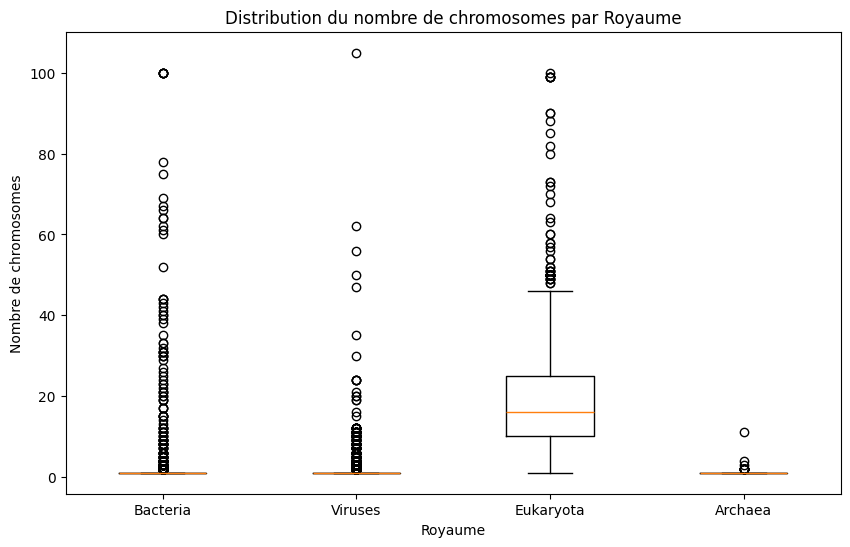

In [42]:
Dict_Chrs = {r: [] for r in Royaume}

for idx, line in table_filtered.iterrows():
    Dict_Chrs[line['Kingdom']].append(int(line['Chrs']))

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(Dict_Chrs.values(), tick_labels=Dict_Chrs.keys())

ax.set_title("Distribution du nombre de chromosomes par Royaume")
ax.set_xlabel("Royaume")
ax.set_ylabel("Nombre de chromosomes")

plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

Les Eucaryotes ont plus de chromosomes en moyennes que la plupart (qui n'en ont qu'un seul.)
Ce qui est attendu, car on retrouve des êtres complexes dans les eucaryotes. (champignons, êtres vivants ...)

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

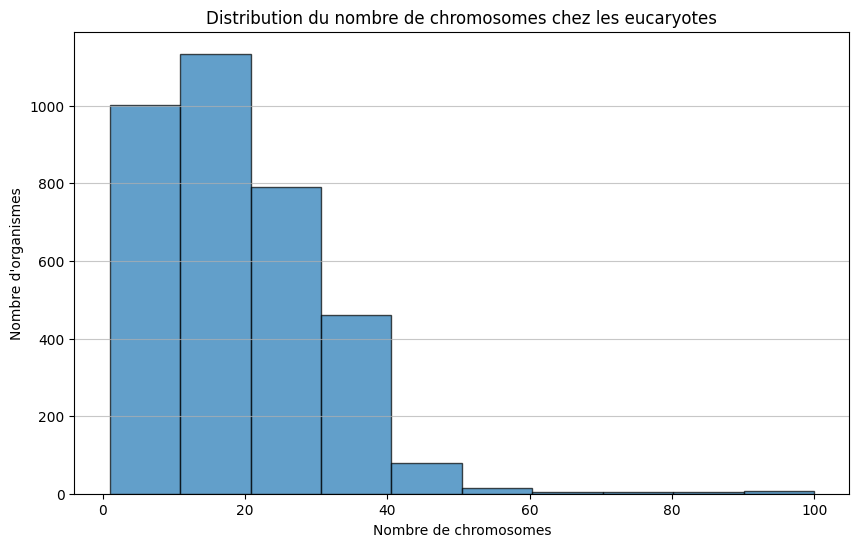

In [45]:
# Filtrer les valeurs non valides et convertir en int
table_filtered = table[table['Chrs'] != '-'].copy()
table_filtered['Chrs'] = table_filtered['Chrs'].astype(int)
table_filtered = table_filtered[table_filtered['Kingdom'] == "Eukaryota"]

plt.figure(figsize=(10, 6))
plt.hist(table_filtered['Chrs'], edgecolor='black', alpha=0.7)

plt.title("Distribution du nombre de chromosomes chez les eucaryotes")
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Nombre d'organismes")
plt.grid(axis='y', alpha=0.7)

plt.show()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

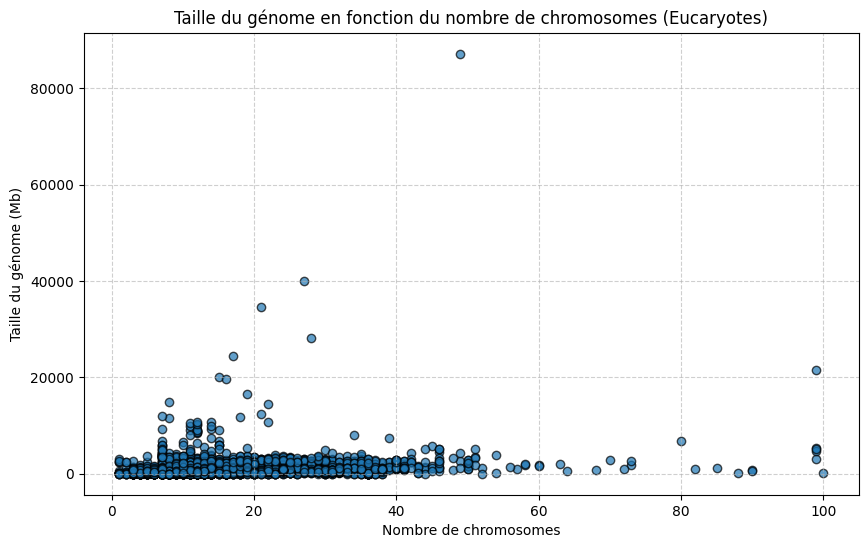

In [48]:
eucaryotes = table[(table["Kingdom"] == "Eukaryota") & (table["Size (Mb)"] != "-") & (table["Chrs"] != "-")].copy()

eucaryotes["Size (Mb)"] = eucaryotes["Size (Mb)"].astype(float)
eucaryotes["Chrs"] = eucaryotes["Chrs"].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(eucaryotes["Chrs"], eucaryotes["Size (Mb)"], alpha=0.7, edgecolors='black')

# Personnalisation du graphique
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Taille du génome (Mb)")
plt.title("Taille du génome en fonction du nombre de chromosomes (Eucaryotes)")
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage
plt.show()

Q21. Qu’observez-vous ?

Beaucoup de petits génomes avec entre 0 et 40 chromosomes. C'est la majorité.

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
ADN sous forme circulaire (qui n'est pas de l'ADN génomique)
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

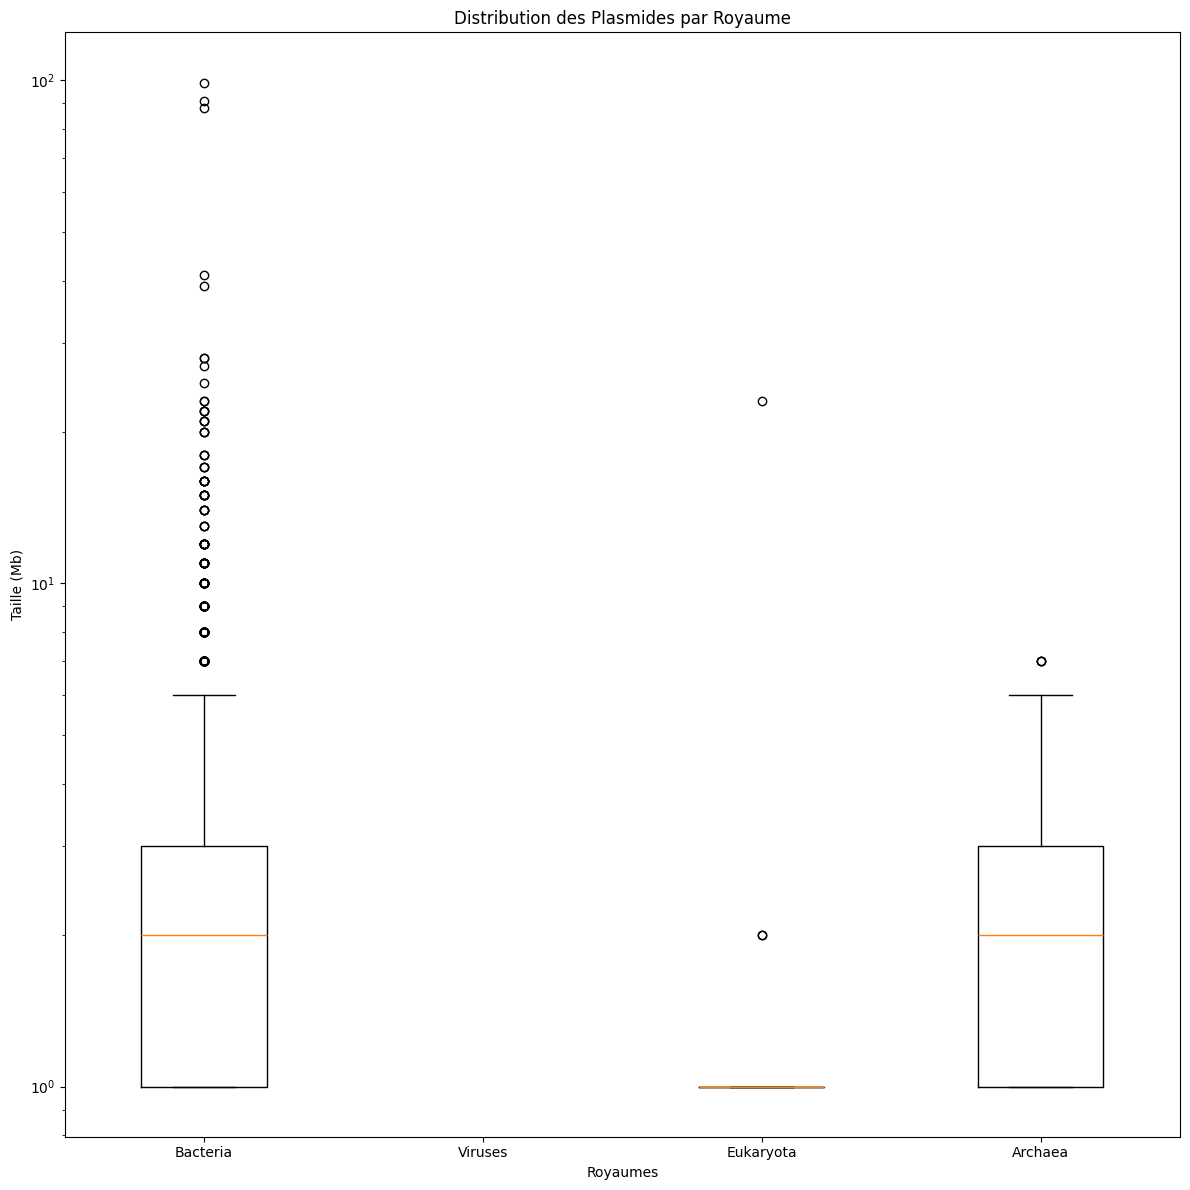

In [56]:
Plsmids = table[table['Plasmids'] != '-']

Dict_pls = {r: [] for r in Royaume}

for index, element in Plsmids.iterrows():
    Dict_pls[element['Kingdom']].append(int(element['Plasmids']))

fig, ax = plt.subplots(figsize=(12,12))

ax.set_yscale('log')
ax.boxplot(Dict_pls.values(), tick_labels=Dict_pls.keys())
ax.set_title("Distribution des Plasmides par Royaume")
ax.set_ylabel("Taille (Mb)")
ax.set_xlabel("Royaumes")

plt.tight_layout()
plt.show()

Q24. Qu'observez-vous ?

Aucun plasmides ches les virus.

## Projets

Q25. Qu'est-ce qu'un projet ?

Un **projet** peut désigner un projet scientifique visant à séquencer l'ADN ou l'ARN d'un organisme particulier ou d'un groupe d'organismes, dans le but de mieux comprendre leur génétique, leur évolution, ou leur rôle écologique.

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

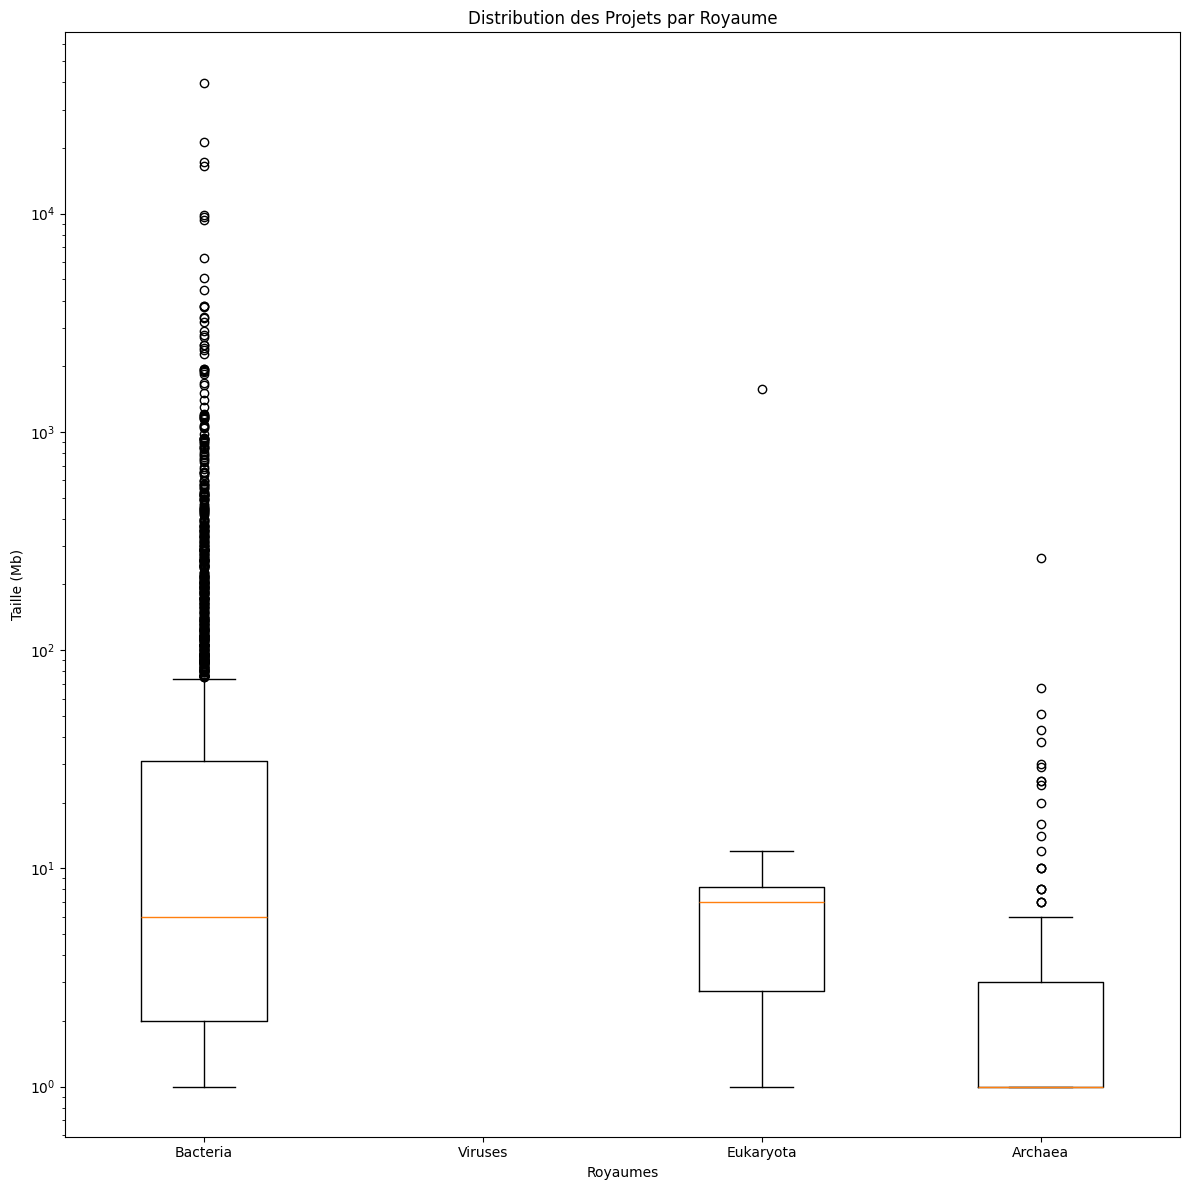

In [58]:
Projets = table[table['BioProjects'] != '-']

Dict_prj = {r: [] for r in Royaume}

for index, element in Plsmids.iterrows():
    Dict_prj[element['Kingdom']].append(int(element['BioProjects']))

fig, ax = plt.subplots(figsize=(12,12))

ax.set_yscale('log')
ax.boxplot(Dict_prj.values(), tick_labels=Dict_prj.keys())
ax.set_title("Distribution des Projets par Royaume")
ax.set_ylabel("Taille (Mb)")
ax.set_xlabel("Royaumes")

plt.tight_layout()
plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [64]:
noproj = table[table["BioProjects"] == '-']
print(len(noproj))

2


Q28. Combien d'organismes ont > 1 projets ?

In [70]:
oneproj = table[table["BioProjects"] != '-'].copy()
oneproj["BioProjects"] = oneproj["BioProjects"].astype(int)
oneproj = oneproj[oneproj["BioProjects"] > 1]

print(len(oneproj))

18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [78]:
top5 = oneproj.sort_values(by="BioProjects", ascending=False).copy().head(5)
top5

,#Organism/Name,Kingdom,Group,SubGroup,Size (Mb),Chrs,Organelles,Plasmids,BioProjects
29710,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,5.5946,3,-,18,39907
41700,Klebsiella pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,5.68232,2,-,13,21229
75957,Staphylococcus aureus,Bacteria,Terrabacteria group,Bacillota,2.82136,1,-,10,17228
70775,Salmonella enterica,Bacteria,Pseudomonadota,Gammaproteobacteria,4.95138,100,-,9,16613
83689,uncultured Lachnospiraceae bacterium,Bacteria,Terrabacteria group,Bacillota,7.69547,-,-,-,15909


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

En raison de leur impact médical et environnemental, leur utilisation comme modèles biologiques, leur rôle dans les infections humaines, et leur implication dans des problèmes de résistance aux antibiotiques.

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

# **JE NE PEUX ACCEDER AU SITE...**

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici